In [582]:
import random as random
import pandas as pd
import numpy as np
from skimpy import skim
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, RFE
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

import requests
from PIL import Image
from io import BytesIO 

import ray
import optuna
from multiprocessing import Pool, get_context
from multiprocessing.pool import ThreadPool

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, Dropout, BatchNormalization

In [9]:
class UberVision:

    # global path variable
    data_connection = '/uber_eats/restaurants.csv'
    author = 'Ben Stager, 2024'

    def __init__(self) -> None:
        return

    # load csv into memory
    def load_data(self, cols=''):  
        self.cols = cols 
        if cols == '':
            return pd.read_csv(UberVision.data_connection)

    def load_image(self, url_arr):
        self.url_arr = url_arr
        
        if url_arr is list():
            self.url_arr = url_arr
            images = []
            print(url_arr)

            for url in url_arr:
                response = requests.get(url)
                img = Image.open(BytesIO(response.content))
                images.append(img)

            return images
        
        self.url_arr = url_arr
        images = []
        print(url_arr)
    
    def extract_feature(self, img):
        self.img_arr = img

        resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        features_img = resnet.predict(img_array)[0]

        return features_img
    
    
    def prepare_extract_features(self, img_arr):

        self.img_arr = img_arr
        features = []

        resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

        for img in img_arr:
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            features_img = resnet.predict(img_array)

            features.extend(features_img[0])

        return features
    
    def UberBaseline():
        pass
        
    def UberXGBoost():
        pass

    def UberRandomForest():
        pass

    def UberBaseline():
        pass

In [44]:
class MarketModel():

    default_model_list = ['baseline', 'log_reg', 'rf', 'xgb', 'nn']
    
    def __init__(self, models = 'baseline'):
        self.models = models

In [10]:
def load_image(url_arr):
    images = []
    print(url_arr)

    for url in url_arr:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        images.append(img)

    return images

In [11]:
def prepare_extract_features(img_arr):
    features = []

    resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

    for img in img_arr:
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        features_img = resnet.predict(img_array)

        features.extend(features_img[0])

    return features

In [324]:
img_cols = []
img_cols.append('loc_no_address')
img_cols.append('loc_name')
[img_cols.append(f'img{i}') for i in range(1,6)]
img_cols.append('review_rating')
img_cols.append('price_bucket')

df = pd.read_csv('Ubereat_US_Merchant.csv')
df['loc_name'] = df['loc_name'].apply(lambda x: x.lstrip())
df['loc_name'] = df['loc_name'].apply(lambda x: x.rstrip())
df = df.dropna(subset=img_cols[2:7])
df['loc_no_address'] = df['loc_name'].apply(lambda x: x.split('(')[0])

df = df[img_cols]

df = df.groupby('loc_no_address').agg({'img1':'first','img2':'first','img3':'first','img4':'first','img5':'first','review_rating':'mean', 'price_bucket':'first'}).reset_index()

df_labeled = df[df['review_rating'].isna() == False]
df_unlabeled = df[df['review_rating'].isna() == True]

features = pd.read_csv('design_matrix.csv')

df_training = pd.concat([df_labeled.reset_index().drop('index',axis=1), features.reset_index().drop(['index', 'Unnamed: 0'],axis=1)],axis=1)

one = df_training.drop('review_rating',axis=1)
two = df_training['review_rating']

df_training = pd.concat([one,two],axis=1)
df_training = df_training[df_training['price_bucket'].isna() == False]
df_training = df_training[df_training['price_bucket'] != '$$$']
df_training_X = df_training.drop(['loc_no_address', 'review_rating', 'img1', 'img2', 'img3', 'img4', 'img5', 'price_bucket'],axis=1)
df_training_y = df_training['review_rating']

In [320]:
df_training

,loc_no_address,img1,img2,img3,img4,img5,price_bucket,0,1,2,...,10231,10232,10233,10234,10235,10236,10237,10238,10239,review_rating
0,A-Wings,https://d1ralsognjng37.cloudfront.net/8a8f9fac...,https://d1ralsognjng37.cloudfront.net/565b7132...,https://d1ralsognjng37.cloudfront.net/9089e663...,https://d1ralsognjng37.cloudfront.net/f14d9c8d...,https://d1ralsognjng37.cloudfront.net/97aa6068...,$,0.396905,0.989555,0.650007,...,0.272400,0.056554,0.012286,0.413810,1.652780,0.122063,0.079103,0.598357,1.504937,4.300000
1,American Deli,https://d1ralsognjng37.cloudfront.net/f143b026...,https://d1ralsognjng37.cloudfront.net/dd01cf1b...,https://d1ralsognjng37.cloudfront.net/b61eb494...,https://d1ralsognjng37.cloudfront.net/26c43205...,https://d1ralsognjng37.cloudfront.net/10957fac...,$,0.792126,0.496573,0.746504,...,0.219182,0.023474,0.028314,0.203113,0.936146,0.000000,0.080060,1.207266,0.972996,4.550000
2,Another Broken Egg,https://d1ralsognjng37.cloudfront.net/9a1f5119...,https://d1ralsognjng37.cloudfront.net/1aa4b4cd...,https://d1ralsognjng37.cloudfront.net/96bad348...,https://d1ralsognjng37.cloudfront.net/00d08797...,https://d1ralsognjng37.cloudfront.net/86e9ac4b...,$$,0.747007,0.301687,0.289598,...,0.110045,0.054643,0.205453,0.283537,0.427666,0.016387,0.298120,0.776804,0.217182,4.000000
3,Applebee's,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,$$,0.233115,0.143522,0.572164,...,0.103028,0.027011,0.013292,0.101044,0.843668,0.036017,0.076841,0.187510,0.127159,4.320000
4,Arby's,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,$,0.348905,0.348105,0.526025,...,0.021343,0.100894,0.037643,0.087031,1.626024,0.000000,0.248577,0.281134,0.118588,4.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Winn-Dixie,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,$,0.629124,0.404214,0.457792,...,0.186591,0.079773,0.209391,0.371915,0.252599,0.022779,0.140374,1.138513,0.536448,4.566667
250,Wylam Wings & Things,https://d1ralsognjng37.cloudfront.net/13aee1f3...,https://d1ralsognjng37.cloudfront.net/b1ff4963...,https://d1ralsognjng37.cloudfront.net/3d2b76e8...,https://d1ralsognjng37.cloudfront.net/2aeebee2...,https://d1ralsognjng37.cloudfront.net/3636765e...,$,0.811521,0.769343,0.978863,...,0.177792,0.000000,0.033081,0.351738,1.786475,0.017507,0.137594,1.465683,0.386611,4.300000
251,Yan Express,https://d1ralsognjng37.cloudfront.net/f0e09631...,https://d1ralsognjng37.cloudfront.net/78064d9e...,https://d1ralsognjng37.cloudfront.net/94382eea...,https://d1ralsognjng37.cloudfront.net/99a6ab6c...,https://d1ralsognjng37.cloudfront.net/5525512a...,$,0.250682,0.206587,2.015194,...,0.410902,0.007149,0.013011,0.201723,1.763477,0.229528,0.069216,0.844033,0.988771,4.800000
254,Zaxby's,https://d1ralsognjng37.cloudfront.net/6ba38ed9...,https://d1ralsognjng37.cloudfront.net/1a1ac399...,https://d1ralsognjng37.cloudfront.net/8d8b9014...,https://d1ralsognjng37.cloudfront.net/a1ff0c82...,https://d1ralsognjng37.cloudfront.net/5ddb6a53...,$,0.243410,0.107932,0.140627,...,0.105874,0.131819,0.056349,0.312366,0.421030,0.025870,0.036280,0.154793,1.135029,4.357143


In [140]:
img_cols = [url for url in df_labeled.iloc[0][['img1','img2','img3','img4','img4']].values]

In [170]:
loaded_images = []
design_matrix = []

for idx in range(df_labeled.shape[0]):
    img_cols = [url for url in df_labeled.iloc[idx][['img1','img2','img3','img4','img4']].values]
    images = load_image(img_cols)

    extracted_features = prepare_extract_features(images)
    design_matrix.append(extracted_features)

['https://d1ralsognjng37.cloudfront.net/8a8f9fac-3d8b-4d52-bfc6-dfdcede9f1c3.jpeg', 'https://d1ralsognjng37.cloudfront.net/565b7132-7a47-4594-8d1b-c5106a33e902.jpeg', 'https://d1ralsognjng37.cloudfront.net/9089e663-f58f-4fd5-955c-fe321a7f1877.jpeg', 'https://d1ralsognjng37.cloudfront.net/f14d9c8d-2afe-48e8-a777-c261c3a8984d.jpeg', 'https://d1ralsognjng37.cloudfront.net/f14d9c8d-2afe-48e8-a777-c261c3a8984d.jpeg']
1/1 [==============================] - 0s 312ms/step
['https://d1ralsognjng37.cloudfront.net/f143b026-3c9f-40b9-963a-bd7eb432e18c.jpeg', 'https://d1ralsognjng37.cloudfront.net/dd01cf1b-23b0-4057-b072-fdf1e8fd12f6.jpeg', 'https://d1ralsognjng37.cloudfront.net/b61eb494-eeee-4c66-856c-9731b236ee30.jpeg', 'https://d1ralsognjng37.cloudfront.net/26c43205-bbe8-4777-909c-9d39fc258b2b.jpeg', 'https://d1ralsognjng37.cloudfront.net/26c43205-bbe8-4777-909c-9d39fc258b2b.jpeg']
1/1 [==============================] - 0s 310ms/step
['https://d1ralsognjng37.cloudfront.net/9a1f5119-3ce1-43d1-9ec

In [243]:
def run_PCA(X_train, X_test, use_all=True, num_to_use=3, num_components=3):
    
    if use_all:
        pca = PCA()
        X_train_PCA = pca.fit_transform(X_train)[:,:num_to_use]
        X_test_PCA = pca.transform(X_test)[:,:num_to_use]

        return X_train_PCA, X_test_PCA
    
    pca = PCA(num_components)
    return pca.fit_transform(X_train), pca.transform(X_test)

In [303]:
X_train, X_test, y_train, y_test = train_test_split(df_training_X, df_training_y, test_size=.25)
X_train_PCA, X_test_PCA = run_PCA(X_train, X_test, use_all=True)

In [304]:
X_train_PCA, X_test_PCA = run_PCA(X_train, X_test, use_all=True)

# baseline

In [305]:
y_preds_baseline = np.round(np.tile(np.average(np.round(y_train,1)), y_test.shape[0]),1)
error_baseline = mean_squared_error(y_test, y_preds_baseline)

In [306]:
error_baseline

0.11027964143990932

# SLR

In [307]:
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
X_train_rfe = rfe.fit_transform(X_train_PCA, y_train)
X_test_rfe = rfe.transform(X_test_PCA)

model.fit(X_train_rfe, np.log(y_train))
y_preds_SLR = np.exp(model.predict(X_test_rfe))

error_SLR = mean_squared_error(y_test, y_preds_SLR)

In [308]:
error_SLR

0.1125943118218026

In [270]:
y_train_BC, fit_lambda = stats.boxcox(y_train + 1)

In [274]:
from scipy.special import inv_boxcox

In [280]:
model = LinearRegression()
model.fit(X_train_PCA, np.log(y_train))
y_preds = np.exp(model.predict(X_test_PCA))
error_SLR = mean_squared_error(y_test, y_preds)

In [281]:
mean_squared_error(y_test, y_preds)

0.12558586961466323

In [33]:
df_training.columns

Index(['loc_no_address', 'img1', 'img2', 'img3', 'img4', 'img5', '0', '1', '2',
       '3',
       ...
       '10231', '10232', '10233', '10234', '10235', '10236', '10237', '10238',
       '10239', 'review_rating'],
      dtype='object', length=10247)

# KNN

In [197]:
from sklearn.neighbors import KNeighborsRegressor

In [200]:
k = 20
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(pca.fit_transform(X_train), np.log(y_train))
y_preds_KNN = np.round(np.exp(model.predict(pca.fit_transform(X_test))),1)
error_KNN = mean_squared_error(y_test, y_preds_KNN)

2/2 [==============================] - 0s 3ms/step


In [201]:
error_KNN

0.11892105553629233

# randomforest regression

In [53]:
np.round(y_preds_baseline, 1)

array([4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
       4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
       4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
       4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
       4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5])

In [193]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),          
        'max_depth': trial.suggest_int('max_depth', 10, 100, step=1),            
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, step=1),  
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 4, step=1),      
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])    
    }

    model = RandomForestRegressor(**params)
    model.fit(pca.fit_transform(X_train), y_train)
    y_preds_RF = np.round(model.predict(pca.fit_transform(X_test)), 1)

    error = mean_squared_error(y_test, y_preds_RF)

    return error

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

model = RandomForestRegressor(**study.best_params)

model.fit(pca.fit_transform(X_train), np.log(y_train))
y_preds_RF = np.round(np.exp(model.predict(pca.fit_transform(X_test))),1)

error_RF = mean_squared_error(y_test, y_preds_RF)

[I 2024-10-18 01:40:08,865] A new study created in memory with name: no-name-09950d6e-5be3-4376-bca2-dbdd006f2ed1


[I 2024-10-18 01:40:14,168] Trial 0 finished with value: 0.11857136213860539 and parameters: {'n_estimators': 131, 'max_depth': 60, 'min_samples_split': 7, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.11857136213860539.
[I 2024-10-18 01:40:18,889] Trial 1 finished with value: 0.12622017166241492 and parameters: {'n_estimators': 70, 'max_depth': 75, 'min_samples_split': 8, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.11857136213860539.
[I 2024-10-18 01:40:24,437] Trial 2 finished with value: 0.12346719547193871 and parameters: {'n_estimators': 130, 'max_depth': 62, 'min_samples_split': 9, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.11857136213860539.
[I 2024-10-18 01:40:29,747] Trial 3 finished with value: 0.12055052880527208 and parameters: {'n_estimators': 110, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.11857136213860539.
[I 2024-1

KeyboardInterrupt: 

In [63]:
error_RF = mean_squared_error(y_test, y_preds_RF)

In [64]:
error_RF

0.09362921981292514

In [ ]:
RandomForestRegressor()

# XGB classifier

In [ ]:
StandardScaler().fit

In [40]:
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 0.95, 0.05),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.6, 0.95, 0.05),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100)
    }

    model = XGBRegressor(**params)
    model.fit(pca.fit_transform(X_train)[:,:7], y_train)
    y_preds_XGB = model.predict(pca.fit_transform(X_test)[:,:7])

    error = mean_squared_error(y_test, y_preds_XGB)

    return error

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

model = XGBRegressor(**study.best_params)
model.fit(pca.fit_transform(X_train)[:,:7], y_train)

y_preds_XGB = model.predict(pca.fit_transform(X_test)[:,:7])
error = mean_squared_error(y_test, y_preds_XGB)

[I 2024-10-17 15:06:39,771] A new study created in memory with name: no-name-a253da8c-da56-4cf8-b050-da30a6a71215
/var/folders/k_/y5wzmsx1483f9z9t9tjtdj1m0000gn/T/ipykernel_64984/3786071214.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
/var/folders/k_/y5wzmsx1483f9z9t9tjtdj1m0000gn/T/ipykernel_64984/3786071214.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
/var/folders/k_/y5wzmsx1483f9z9t9tjtdj1m0000gn/T/ipykernel_64984/3786071214.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

In [62]:
error

0.07414454287469988

In [41]:
error

0.07414454287469988

In [32]:
error = mean_squared_error(y_test, y_preds_XGB)

In [33]:
error_baseline = mean_squared_error(y_test, y_preds_baseline)

In [42]:
np.abs((error - error_baseline))/error_baseline

0.016959129585730322

In [43]:
error_baseline

0.0754236625415728

In [25]:
y_preds_XGB = model.predict(pca.fit_transform(X_test)[:,:3])
error = mean_absolute_error(y_test, y_preds_XGB)

In [26]:
error

0.21249116507314497

# neural network ?

In [175]:
error_baseline

0.0754236625415728

In [212]:
pca.fit_transform(X_test).shape[1]

3

In [216]:
def create_MLP(num_layers=2, dropout=.2, units=64):
    model = Sequential()
    model.add(Dense(units=256, input_dim=pca.fit_transform(X_test).shape[1]))
    for i in range(num_layers):
        model.add(Dense(units, activation='tanh'))
        model.add(Dropout(dropout))

    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')

    return model

def objective_nn(trial):
    num_layers = trial.suggest_int('num_layers', 2, 8, step=1)
    dropout_rate = trial.suggest_uniform('dropout_rate', .2, .7)
    units = trial.suggest_int('units', 32, 128, step=10)
    model = create_MLP(num_layers, dropout_rate, units)
    model.fit(pca.fit_transform(X_train), y_train, epochs=200)
    preds = model.predict(pca.fit_transform(X_test))
    
    loss = mean_squared_error(y_test, y_preds)
    
    return loss

study = optuna.create_study(direction='minimize')
study.optimize(objective_nn, n_trials=20)
print(study.best_params)

In [188]:
model = Sequential()

model.add(BatchNormalization())
model.add(Dense(64, input_dim=3, activation='tanh'))
model.add(Dropout(0.5)) 
model.add(BatchNormalization())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5)) 
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

model.fit(pca.fit_transform(X_train), np.log(y_train), epochs=250)

y_preds_MLP = np.round(np.exp(model.predict(pca.fit_transform(X_test))),1)
error = mean_squared_error(y_test, y_preds_MLP)

Epoch 1/250
6/6 [==============================] - 0s 1ms/step - loss: 3.3421
Epoch 2/250
6/6 [==============================] - 0s 2ms/step - loss: 3.0739
Epoch 3/250
6/6 [==============================] - 0s 1ms/step - loss: 2.9166
Epoch 4/250
6/6 [==============================] - 0s 2ms/step - loss: 2.7114
Epoch 5/250
6/6 [==============================] - 0s 1ms/step - loss: 2.7550
Epoch 6/250
6/6 [==============================] - 0s 2ms/step - loss: 2.7502
Epoch 7/250
6/6 [==============================] - 0s 1ms/step - loss: 2.2717
Epoch 8/250
6/6 [==============================] - 0s 1ms/step - loss: 2.3214
Epoch 9/250
6/6 [==============================] - 0s 2ms/step - loss: 2.3204
Epoch 10/250
6/6 [==============================] - 0s 751us/step - loss: 2.0942
Epoch 11/250
6/6 [==============================] - 0s 990us/step - loss: 2.0036
Epoch 12/250
6/6 [==============================] - 0s 685us/step - loss: 1.9972
Epoch 13/250
6/6 [==============================] - 0s 

In [189]:
error

0.11892105553629233

In [185]:
error_baseline

0.11606392166241497

In [145]:
error_baseline

0.0754236625415728

In [85]:
error

1.240452224959869

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='review_rating', ylabel='Count'>

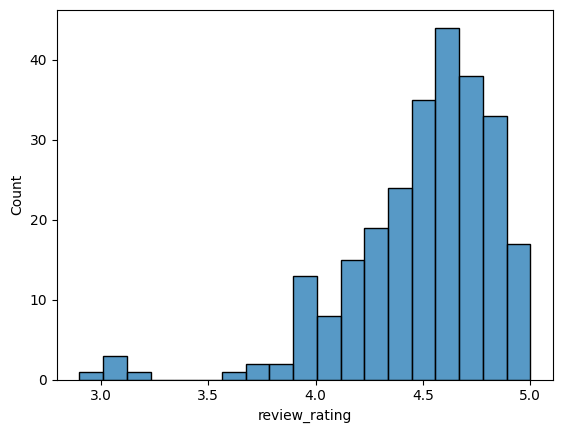

In [28]:
sns.histplot(data=df_training, x='review_rating')

# changing everything

In [283]:
data = pd.read_csv('Ubereat_US_Merchant.csv')

In [322]:
data['price_bucket'].value_counts()

price_bucket
$      553
$$     298
$$$      5
Name: count, dtype: int64

In [290]:
cols_compare = [f'img{num}' for num in range(1,6)]

In [289]:
price_buckets = []

for idx in range(df_training.shape[0]):
    if df_training[]

,loc_no_address,img1,img2,img3,img4,img5,0,1,2,3,...,10231,10232,10233,10234,10235,10236,10237,10238,10239,review_rating
0,A-Wings,https://d1ralsognjng37.cloudfront.net/8a8f9fac...,https://d1ralsognjng37.cloudfront.net/565b7132...,https://d1ralsognjng37.cloudfront.net/9089e663...,https://d1ralsognjng37.cloudfront.net/f14d9c8d...,https://d1ralsognjng37.cloudfront.net/97aa6068...,0.396905,0.989555,0.650007,0.010040,...,0.272400,0.056554,0.012286,0.413810,1.652780,0.122063,0.079103,0.598357,1.504937,4.300000
1,American Deli,https://d1ralsognjng37.cloudfront.net/f143b026...,https://d1ralsognjng37.cloudfront.net/dd01cf1b...,https://d1ralsognjng37.cloudfront.net/b61eb494...,https://d1ralsognjng37.cloudfront.net/26c43205...,https://d1ralsognjng37.cloudfront.net/10957fac...,0.792126,0.496573,0.746504,0.205984,...,0.219182,0.023474,0.028314,0.203113,0.936146,0.000000,0.080060,1.207266,0.972996,4.550000
2,Another Broken Egg,https://d1ralsognjng37.cloudfront.net/9a1f5119...,https://d1ralsognjng37.cloudfront.net/1aa4b4cd...,https://d1ralsognjng37.cloudfront.net/96bad348...,https://d1ralsognjng37.cloudfront.net/00d08797...,https://d1ralsognjng37.cloudfront.net/86e9ac4b...,0.747007,0.301687,0.289598,0.014261,...,0.110045,0.054643,0.205453,0.283537,0.427666,0.016387,0.298120,0.776804,0.217182,4.000000
3,Applebee's,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,0.233115,0.143522,0.572164,0.054754,...,0.103028,0.027011,0.013292,0.101044,0.843668,0.036017,0.076841,0.187510,0.127159,4.320000
4,Arby's,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,https://tb-static.uber.com/prod/image-proc/pro...,0.348905,0.348105,0.526025,0.058251,...,0.021343,0.100894,0.037643,0.087031,1.626024,0.000000,0.248577,0.281134,0.118588,4.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Yan Express,https://d1ralsognjng37.cloudfront.net/f0e09631...,https://d1ralsognjng37.cloudfront.net/78064d9e...,https://d1ralsognjng37.cloudfront.net/94382eea...,https://d1ralsognjng37.cloudfront.net/99a6ab6c...,https://d1ralsognjng37.cloudfront.net/5525512a...,0.250682,0.206587,2.015194,0.064768,...,0.410902,0.007149,0.013011,0.201723,1.763477,0.229528,0.069216,0.844033,0.988771,4.800000
252,Yoe Xpress,https://d1ralsognjng37.cloudfront.net/80dab154...,https://d1ralsognjng37.cloudfront.net/54918625...,https://d1ralsognjng37.cloudfront.net/dee5a4ec...,https://d1ralsognjng37.cloudfront.net/05dd9603...,https://d1ralsognjng37.cloudfront.net/d716b70e...,0.846487,0.312483,1.967403,0.139960,...,0.098179,0.002018,0.001092,0.088788,2.340829,0.002423,0.145886,1.792459,0.259952,4.600000
253,Yogurt Mountain,https://d1ralsognjng37.cloudfront.net/6ae85a93...,https://d1ralsognjng37.cloudfront.net/0e2b111d...,https://d1ralsognjng37.cloudfront.net/1ea30ef9...,https://d1ralsognjng37.cloudfront.net/53dad4be...,https://d1ralsognjng37.cloudfront.net/945551fe...,1.262779,0.233912,0.181400,0.064123,...,0.151377,0.018429,0.132019,0.325624,0.280132,0.013888,0.768020,0.609534,0.217357,4.200000
254,Zaxby's,https://d1ralsognjng37.cloudfront.net/6ba38ed9...,https://d1ralsognjng37.cloudfront.net/1a1ac399...,https://d1ralsognjng37.cloudfront.net/8d8b9014...,https://d1ralsognjng37.cloudfront.net/a1ff0c82...,https://d1ralsognjng37.cloudfront.net/5ddb6a53...,0.243410,0.107932,0.140627,0.052241,...,0.105874,0.131819,0.056349,0.312366,0.421030,0.025870,0.036280,0.154793,1.135029,4.357143


In [328]:
def convert_price(x):
    prices_dict = {'$':0, '$$':1}
    return prices_dict[x]

In [339]:
df_training_X = df_training.drop(['loc_no_address', 'review_rating', 'img1', 'img2', 'img3', 'img4', 'img5', 'price_bucket'],axis=1)
df_training_y = df_training['price_bucket'].apply(convert_price)

In [335]:
pd.value_counts(df_training['price_bucket'])

/var/folders/k_/y5wzmsx1483f9z9t9tjtdj1m0000gn/T/ipykernel_64984/2229461660.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_training['price_bucket'])


price_bucket
$     153
$$     49
Name: count, dtype: int64

In [398]:
df_majority = df_training[df_training['price_bucket'] == '$']
df_minority = df_training[df_training['price_bucket'] == '$$']

In [402]:
df_majority_downsampled = resample(df_majority,
                                    replace=False, 
                                    n_samples=len(df_minority), 
                                    random_state=42)

downsampled_df = pd.concat([df_majority_downsampled, df_minority])


In [644]:
df_training_X[[str(i)for i in range(2049)]]

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
143,0.463016,0.589960,0.926710,0.138614,0.108782,0.056419,0.441736,0.188506,0.222401,0.099920,...,0.327356,0.128978,0.034617,0.699191,0.165186,0.043580,0.126397,0.652439,0.727444,0.309343
148,0.211116,0.174842,1.464942,0.044111,0.138107,0.008161,0.080677,0.087408,0.193404,0.005124,...,0.050413,0.036304,0.071040,0.128026,0.100634,0.002731,1.869315,0.140961,0.274931,0.078761
168,0.911851,0.741372,0.443327,0.062883,0.193671,0.079961,0.158387,0.127346,0.213245,0.061734,...,0.258628,0.181934,0.039014,0.366948,0.161454,0.026807,0.329341,0.359926,0.360862,0.391600
193,0.567048,0.722767,0.967675,0.119341,0.071756,0.079624,0.259608,0.083618,0.154444,0.027214,...,0.094765,0.061873,0.080304,0.160333,0.264776,0.085049,1.226718,0.722574,0.201965,0.517734
60,0.603524,0.438182,2.392473,0.049445,0.047058,0.040511,0.161297,0.075854,0.092175,0.231144,...,0.063188,0.060286,0.032309,0.295804,0.323089,0.073100,0.509654,0.352610,0.926486,0.192435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.736174,0.741014,1.342279,0.213247,0.109703,0.028273,0.280959,0.161145,0.353883,0.058348,...,0.122602,0.109111,0.023688,0.232179,0.270855,0.016124,0.313142,0.386617,0.613834,0.369304
235,1.034488,0.469133,1.686890,0.060608,0.178000,0.110042,0.164091,0.259560,0.428085,0.218599,...,0.108450,0.131915,0.031486,0.550391,0.135545,0.034279,0.465803,0.341378,0.362983,0.422257
237,0.370718,0.167483,0.175503,0.036922,0.310043,0.041430,0.328037,0.155300,0.073349,0.075139,...,0.066575,0.404487,0.048131,0.662239,0.065609,0.017516,0.650987,0.054969,0.407473,0.135148
246,0.963696,0.399557,0.345995,0.052001,0.096075,0.065348,0.723412,0.288579,0.054024,0.087662,...,0.106401,0.127899,0.043305,0.434846,0.099272,0.064115,0.032828,0.223979,0.847156,0.345690


In [659]:
df_training_X = downsampled_df.drop(['loc_no_address', 'review_rating', 'img1', 'img2', 'img3', 'img4', 'img5', 'price_bucket'],axis=1)
df_training_y = downsampled_df['price_bucket'].apply(convert_price)

In [660]:
X_train, X_test, y_train, y_test = train_test_split(df_training_X, df_training_y, test_size=.25)

In [686]:
X_train_PCA, X_test_PCA = run_PCA(X_train, X_test, use_all=False, num_components=3)

In [687]:
y_preds_baseline = np.tile(1, y_test.shape[0])
baseline_accuracy = y_test[y_test == 1].shape[0]/y_test.shape[0]

In [688]:
baseline_accuracy

0.52

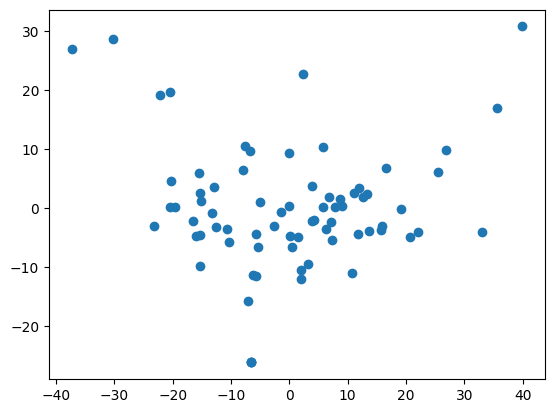

In [562]:
plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1])

In [689]:
model = SVC(kernel='poly')
model.fit(X_train_PCA, y_train)
y_preds_SVC = model.predict(X_test_PCA)
error_SVC = accuracy_score(y_test, y_preds_SVC)

In [690]:
error_SVC

0.48

In [596]:
baseline_accuracy

0.52

In [415]:
y_train

215    1
36     1
20     0
180    1
172    1
      ..
62     0
165    1
220    0
226    0
132    0
Name: price_bucket, Length: 73, dtype: int64

In [691]:
model = LogisticRegression()
model.fit(X_train_PCA, y_train)
y_preds_LR = model.predict(X_test_PCA)
error_LR = accuracy_score(y_test, y_preds_LR)

In [692]:
error_LR

0.64

In [369]:
accuracy_score(y_test, y_preds_LR)
accuracy_score(y_test, y_preds_baseline)

0.803921568627451

In [360]:
pd.value_counts(y_preds_LR)

/var/folders/k_/y5wzmsx1483f9z9t9tjtdj1m0000gn/T/ipykernel_64984/2182241213.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_preds_LR)


0    51
Name: count, dtype: int64

In [693]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),          
        'max_depth': trial.suggest_int('max_depth', 10, 100),            
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, step=1),  
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 4, step=1),      
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])    
    }

    model = RandomForestClassifier(**params)
    model.fit(X_train_PCA, y_train)
    y_preds_RF = model.predict(X_test_PCA)

    error = accuracy_score(y_test, y_preds_RF)

    return error

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

model = RandomForestClassifier(**study.best_params)

model.fit(X_train_PCA, y_train)
y_preds_RF = model.predict(X_test_PCA)

error_RF = accuracy_score(y_test, y_preds_RF)

[I 2024-10-18 17:21:58,212] A new study created in memory with name: no-name-7fd29bbb-9fc2-4342-be5e-5bc25201c48f
[I 2024-10-18 17:21:58,314] Trial 0 finished with value: 0.36 and parameters: {'n_estimators': 190, 'max_depth': 72, 'min_samples_split': 9, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 0.36.
[I 2024-10-18 17:21:58,327] Trial 1 finished with value: 0.36 and parameters: {'n_estimators': 22, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.36.
[I 2024-10-18 17:21:58,390] Trial 2 finished with value: 0.24 and parameters: {'n_estimators': 164, 'max_depth': 34, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.36.
[I 2024-10-18 17:21:58,420] Trial 3 finished with value: 0.24 and parameters: {'n_estimators': 80, 'max_depth': 35, 'min_samples_split': 9, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 0 with value: 0.36.
[I 2024-10-18 

In [533]:
study.best_value

0.64

In [632]:
baseline_accuracy

0.52

In [633]:
np.abs(.52 - .6)/.52

0.15384615384615377

In [696]:
error_RF

0.28

In [380]:
y_test

128    0
186    0
84     0
119    0
158    1
216    0
94     0
212    1
18     0
140    0
60     0
123    1
131    0
83     0
13     0
0      0
236    0
51     0
52     0
226    0
164    0
15     0
166    0
249    0
191    0
181    0
106    0
165    1
25     0
1      0
23     0
174    1
73     0
105    0
147    1
130    0
65     1
218    1
19     1
27     0
154    0
229    0
210    0
245    0
199    0
48     1
189    0
16     0
157    0
49     0
171    0
Name: price_bucket, dtype: int64

In [513]:
import tensorflow as tf
import random as random

In [ ]:
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seed(22)

def create_MLP(num_layers=2, dropout_rate=.5, units=16):
    model = Sequential()
    model.add(Dense(units=32, input_dim=X_train_PCA.shape[1]))
    for i in range(num_layers):
        model.add(Dense(units, activation='tanh'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy')

    return model

def objective_nn(trial):
    num_layers = trial.suggest_int('num_layers', 1, 3, step=2)
    dropout_rate = trial.suggest_uniform('dropout_rate', .2, .7)
    units = trial.suggest_int('units', 1, 16, step=4)
    model = create_MLP(num_layers, dropout_rate, units)
    model.fit(X_train_PCA, y_train, epochs=200)
    y_preds_MLP = model.predict(X_test_PCA)
    y_preds_MLP = (y_preds_MLP > 0.5).astype(int)
    
    loss = accuracy_score(y_test, y_preds_MLP)
    
    return loss

study = optuna.create_study(direction='maximize')
study.optimize(objective_nn, n_trials=20)

set_seed(22)

best_parms = study.best_params
model = create_MLP(**best_parms)

model.fit(X_train_PCA, y_train, epochs=200)
y_preds_MLP = model.predict(X_test_PCA)
y_preds_MLP = (y_preds_MLP > 0.5).astype(int)
error_NN = accuracy_score(y_test, y_preds_MLP)

In [557]:
error_NN

0.6

In [508]:
error_NN

0.6

In [504]:
error_NN

0.52

In [518]:
error_

0.11027964143990932

In [694]:
model = Sequential()

model.add(Dense(8, input_dim = X_train_PCA.shape[1], activation='tanh'))
model.add(Dropout(0.5)) 
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

model.fit(X_train_PCA, y_train, epochs=200)

y_preds_MLP = model.predict(X_test_PCA)
y_preds_MLP = (y_preds_MLP > 0.5).astype(int)
error_NN = accuracy_score(y_test, y_preds_MLP)

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 0.7808
Epoch 2/200
3/3 [==============================] - 0s 1ms/step - loss: 0.7464
Epoch 3/200
3/3 [==============================] - 0s 3ms/step - loss: 0.8791
Epoch 4/200
3/3 [==============================] - 0s 2ms/step - loss: 0.7908
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 0.8259
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 0.7987
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 0.8384
Epoch 8/200
3/3 [==============================] - 0s 2ms/step - loss: 0.7686
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 0.8385
Epoch 10/200
3/3 [==============================] - 0s 1ms/step - loss: 0.8459
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss: 0.9094
Epoch 12/200
3/3 [==============================] - 0s 2ms/step - loss: 0.9067
Epoch 13/200
3/3 [==============================] - 0s 2ms/st

In [695]:
error_NN

0.52

In [485]:
y_preds_MLP

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [387]:
error_NN

0.803921568627451

In [391]:
print(y_preds_MLP)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
